# Polynomial Regression

In [14]:
#import needed libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
#Fetching the closing price data of HDFC Bank
ticker = "HDFCBANK.NS"
data = yf.download(ticker, period="6mo", interval="1d")

[*********************100%***********************]  1 of 1 completed


In [16]:
#reseting the index and extracting the relevant columns
data.reset_index(inplace=True)
data = data[['Date', 'Close']]
data['Days'] = (data['Date'] - data['Date'].min()).dt.days  # Convert date to numerical format

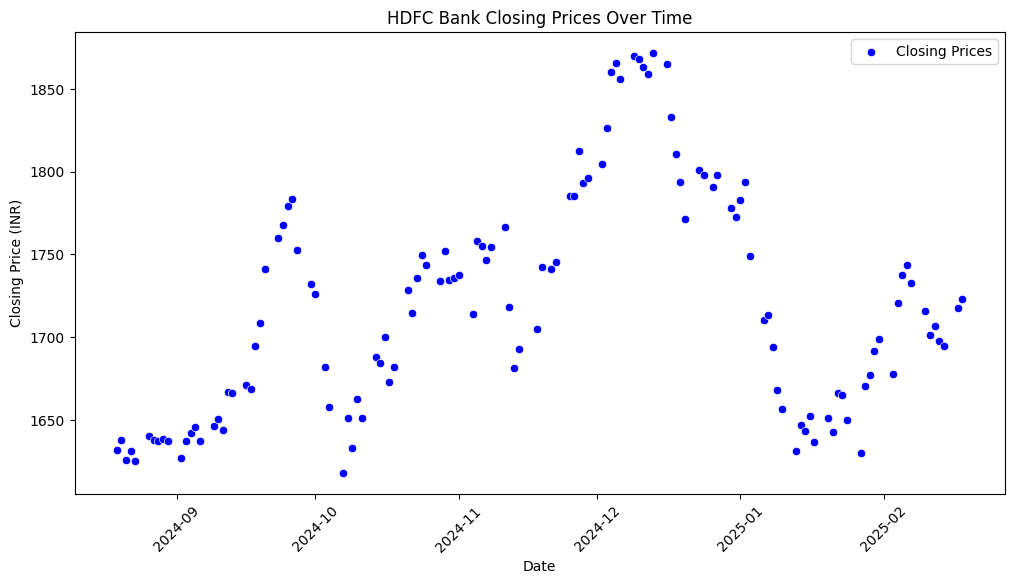

In [19]:
#scatter plot of closing prices
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data['Date'], y=data['Close'].squeeze(), color='blue', label='Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.title('HDFC Bank Closing Prices Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [20]:
#Splitting
X = data[['Days']]
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#applying polynomial regression
degree = 3
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [22]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [23]:
#predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

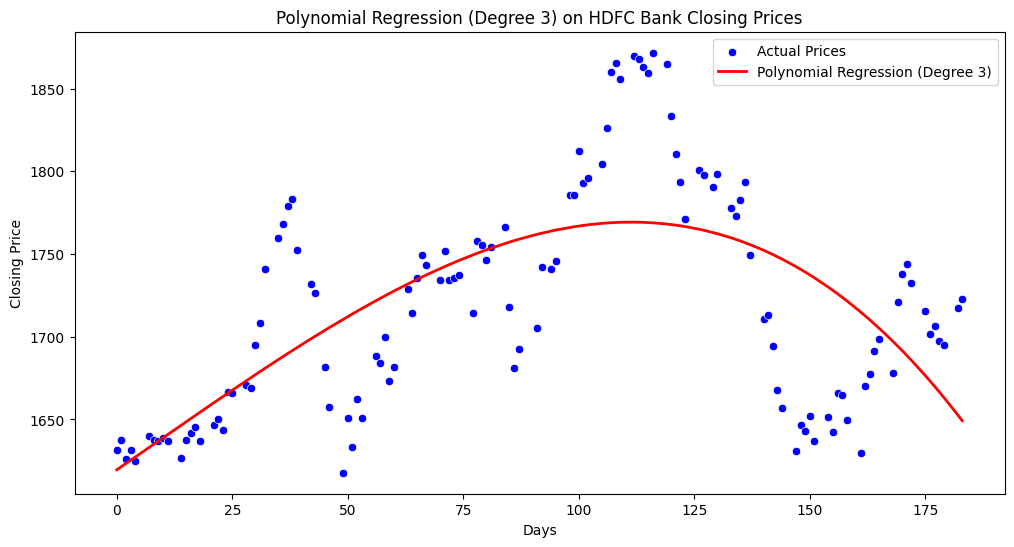

In [28]:
#plotting polynomial regression fit
plt.figure(figsize=(12, 6))

# Scatter plot for actual prices
sns.scatterplot(x=data['Days'], y=data['Close'].values.flatten(), color='blue', label='Actual Prices')

# Polynomial regression curve
plt.plot(data['Days'], model.predict(poly.transform(X)).flatten(), color='red', linewidth=2, label=f'Polynomial Regression (Degree {degree})')

plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.title(f'Polynomial Regression (Degree {degree}) on HDFC Bank Closing Prices')
plt.legend()
plt.show()

In [29]:
#Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [31]:
print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"Train R2 Score: {train_r2:.4f}")
print(f"Test R2 Score: {test_r2:.4f}")

Train MSE: 2499.50
Test MSE: 2865.63
Train R2 Score: 0.4451
Test R2 Score: 0.4171
